# Aprendizado de Máquina - Trabalho 1

## Regressão Linear com uma Variável

Nessa parte do trabalho, será necessário implementar a regressão linear para predizer
o lucro para uma cadeia de food truck. Essa cadeia já possui diversas filiais
em diferentes cidades. Existem dados dos lucro e população para cada uma
dessas cidades.
O arquivo ex1data1.txt contém os dados a serem usados nessa parte do
trabalho. A primeira coluna corresponde à população de cada cidade, enquanto
que a segunda coluna corresponde ao lucro da filial daquela cidade. Um valor
negativo para o lucro indica que a filial correspondente está dando prejuízo.

Antes de iniciar o estudo dos dados do arquivo "ex1data1.txt" devem ser importadas as bibliotecas necessárias.

In [1]:
#Importando bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#Carregando os dados
dados = np.loadtxt('C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T1\\ex1data1.txt', delimiter=',')

populacao, lucro = dados[:,0:-1], dados[:, -1:]




## 1.1 Visualização dos Dados

Para a maioria dos conjunto de dados do mundo real, não é possível criar um
gráfico para visualizar seus pontos. Mas, para o conjunto de dados fornecido
nesse trabalho, isso é possível. Abaixo, se verifica a implementação de um script em Python que produz
um gráfico de dispersão (scatter plot) dos dados fornecidos.

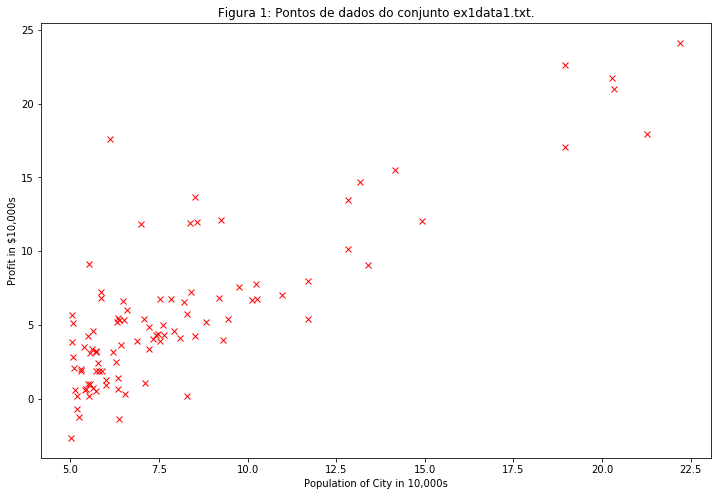

In [2]:

#gráfico de dispersão (scatter plot) dos dados (tanto o título dos eixos em inglês, quanto os parâmetros color='Red' e marker='x'
# foram assim definidos para corresponder ao que está indicado  na Figura 2 do enunciado do trabalho).
plt.figure(figsize=(12,8))
plt.plot(populacao, lucro, 'x', color='Red',marker='x')
plt.title('Figura 1: Pontos de dados do conjunto ex1data1.txt.')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()


Conforme se observa no gráfico, parece haver uma correlação entre a população de uma cidade e o lucro obtido.


## 1.2 Gradiente Descendente
Nessa parte, a tarefa é determinar os parâmetros do modelo de regressão linear
por meio do algoritmo Gradiente Descendente, utilizando a versão batch gradient
descendente desse algoritmo. 

In [3]:
# Define X (dados de treinamento) e y (variável alvo)
x, y = dados[:,0:-1], dados[:, -1:]
bias = np.ones((x.shape[0], 1))
x_ = np.hstack((bias, x))
theta = np.zeros(x_.shape[1])


O objetivo é, então, obter a reta que melhor se aproxima da relação entre a variável dependente e a variável independente.

A equação da reta é dada por: hθ=θ(0)+θ(1)x , onde hθ é a variável a ser gerada (hipótese), θ(0) é a ordenada de origem (onde a reta corta Y) e θ(1) é a inclinação da reta.

In [4]:
def h(x, theta):
    """
    h(X, theta) calcula hipotese 
    """
    return np.dot(x, theta).reshape(-1, 1)

A função "computarCusto", que calcula a função de custo, usa theta como 
parametro da regressão linear para ajustar os pontos em X e y.



In [5]:
%run -i "computarCusto.py"
"""
def computarCusto(X, y, theta):

    return np.power(h(X, theta) - y, 2).mean()/2

"""



'\ndef computarCusto(X, y, theta):\n\n    return np.power(h(X, theta) - y, 2).mean()/2\n\n'

In [6]:
"""
"Após implementar essa função, você pode verificar a cor-
retude executando com todos os parâmetros iguais a zero. Nessa situação, sua
função deve gerar um valor igual a 32,07."
"""
result = (computarCusto(x, y, 0))
print ("Com todos os parâmetros iguais a zero, a função gera um valor igual a %.2f." % result)

Com todos os parâmetros iguais a zero, a função gera um valor igual a 32.07.


O objetivo do algoritmo de aprendizado é descobrir quais os parâmetros de entrada permitem gerar uma reta adequada, que consistem em que a distância de cada ponto para a reta seja a menor possível. A distância é chamada de função custo e é dada por:

1/2m∑(h(X)−y)^2 

O objetivo então é minimizar este valor:

minθ1,θ2=J(θ1,θ2)

Isto é, obter o valor de J(θ1,θ2) mais próximo de 0.

Implementação do algoritmo gradiente descendente foi implementada em gduni.py

In [7]:
%run -i "gduni.py"

"""

def gduni(x, y, theta, alpha, numerodeiteracoes):

    thetas = [theta]
    custos = []
    for i in range(numerodeiteracoes):
        delta = alpha * np.multiply(h(x, theta)-y, x).mean(0)
        theta = theta - delta
        thetas.append(theta)
        custo = computarCusto(x, y, theta)
        custos.append(custo)
    return thetas, custos

"""

'\n\ndef gduni(x, y, theta, alpha, numerodeiteracoes):\n\n    thetas = [theta]\n    custos = []\n    for i in range(numerodeiteracoes):\n        delta = alpha * np.multiply(h(x, theta)-y, x).mean(0)\n        theta = theta - delta\n        thetas.append(theta)\n        custo = computarCusto(x, y, theta)\n        custos.append(custo)\n    return thetas, custos\n\n'

In [8]:
iteracoes = 3000
(gd, custo) = gduni(x_,y,theta,0.01, iteracoes)


In [9]:
def normal_equation(x, y):
    x = np.matrix(x)
    y = np.matrix(y)
    return np.linalg.pinv(x.T * x) * x.T * y



In [10]:
theta_gradient_descent = gd[-1]
y_35 = h([1, 3.5], theta_gradient_descent)[0, 0]
y_7 = h([1, 7], theta_gradient_descent)[0, 0]

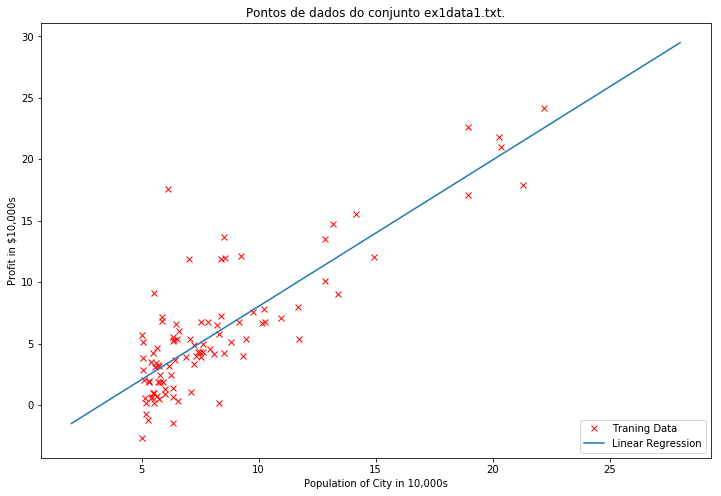

In [11]:
plt.figure(figsize=(12,8))
plt.plot(x, y, 'x', label='Traning Data', color='Red',marker='x')
px = range(2, 30, 2)
py = [h(np.array([1, i]), theta_gradient_descent)[0, 0] for i in px]
plt.plot(px, py, label='Linear Regression')
plt.title('Pontos de dados do conjunto ex1data1.txt.')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)
plt.show()

Lucro em regiões com populações de 35.000 habitantes = $ 2913.33
Lucro em regiões com populações de 70.000 habitantes = $ 44607.16


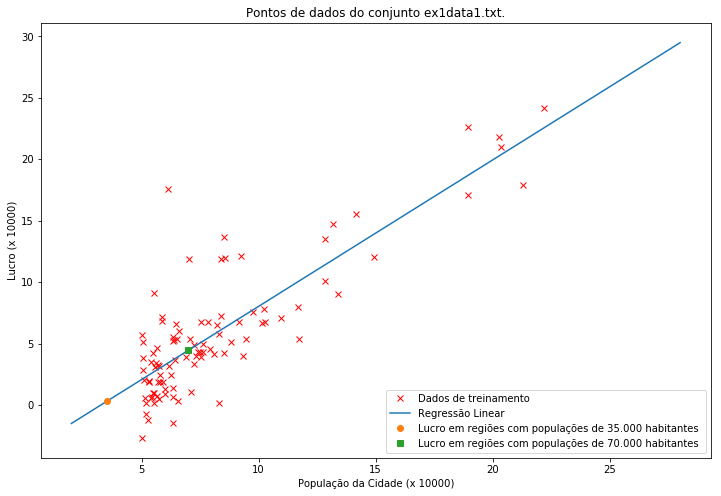

In [13]:
"""
"Usar o modelo de regressão linear produzido pelo seu código para predizer o lucro em regiões com
populações de 35.000 e 70.000 habitantes. 
"""

print ("Lucro em regiões com populações de 35.000 habitantes = $ %.2f" % (10000.0*y_35))
print ("Lucro em regiões com populações de 70.000 habitantes = $ %.2f" % (10000.0*y_7))

plt.figure(figsize=(12,8))
plt.plot(x, y, 'x', label='Dados de treinamento', color='Red',marker='x')
px = range(2, 30, 2)
py = [h(np.array([1, i]), theta_gradient_descent)[0, 0] for i in px]
plt.plot(px, py, label='Regressão Linear')
#plt.plot([3.5, 7], [y_35, y_7], 'o', label='Lucro em regiões com populações de x habitantes ')
plt.plot([3.5], [y_35], 'o', label='Lucro em regiões com populações de 35.000 habitantes ')
plt.plot([7], [y_7], 's', label='Lucro em regiões com populações de 70.000 habitantes ')
plt.title('Pontos de dados do conjunto ex1data1.txt.')
plt.xlabel('População da Cidade (x 10000)')
plt.ylabel('Lucro (x 10000)')
plt.legend(loc=4)
plt.show()



## 1.3 Visualização de J(θ)


Para melhor entender a função de custo, nessa parte do trabalho 
é plotado o custo sobre uma grade bidimensional de valores de θ(0) e θ(1).

Array bidimensional de valores de J(θ): Os valores gerados pelo  código estão 
na faixa 10≤θ(0)≤ +10 e  1≤ θ(0)≤ +4 com incremento de 0,01 para gerar
os valores de θ(0) e de θ(1).

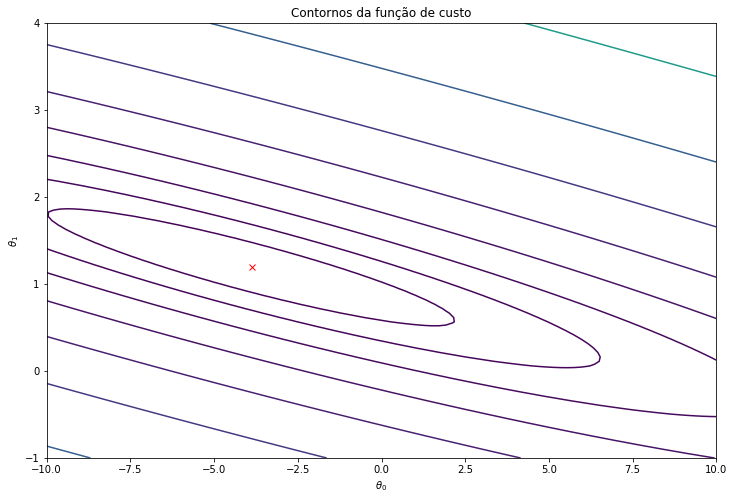

In [19]:
#1.3 Visualização de J(theta)
# Grade bidimensional
theta0s = np.linspace(-10, 10, 100)
theta1s = np.linspace(-1, 4, 100)
theta0s, theta1s = np.meshgrid(theta0s, theta1s)
m, n = theta0s.shape
hs = np.array([computarCusto(x_, y, [theta0s[i, j], theta1s[i, j]]) 
for i in range(m) for j in range(n)]).reshape(m, n)

# Plota valoresJ como 20 contornos espaçados de forma logaritmica
plt.figure(figsize=(12,8))
plt.contour(theta0s, theta1s, hs, np.logspace(-2, 3, 20))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title(r'Contornos da função de custo')
plt.plot(theta_gradient_descent[0], theta_gradient_descent[1], 'rx')
plt.show()

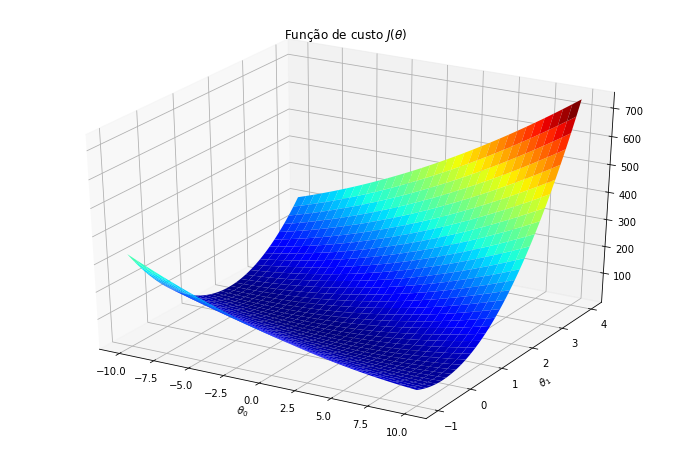

In [20]:

#Também utilizando a biblioteca matplotlib, crie um gráfico da superfície correspondente a J(θ).




fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0s, theta1s, hs, rstride=3, cstride=3, cmap=plt.cm.jet, linewidth=0.3, antialiased=True)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title(r'Função de custo $J(\theta)$')
plt.show()




# Regressão Linear com Múltiplas Variáveis
Nessa parte do trabalho, será implementada a regressão linear com múltiplas variáveis
 para predizer o preço de venda de imóveis. O arquivo ex1data2.txt
contém informações acerca de preços de imóveis. A primeira coluna corresponde
ao tamanho do imóvel (em pés quadrados). A segunda coluna corresponde a
quantidade de dormitórios no imóvel em questão. A terceira coluna corresponde
ao preço do imóvel.


In [21]:
#  Regressão Linear com Múltiplas Variáveis

import numpy as np
import matplotlib.pyplot as plt

    
# Carregando os dados;
# Como será feito um cálculo da média, já podemos nessa
# etapa obter o valor de itens do arquivo, 
# que será armazenado em 'numlinhas'


def carrega(arquivo):
    fr = open(arquivo)
    linhas = fr.readlines()
    numlinhas = len(linhas)

    x = np.zeros((numlinhas, 2))
    y = np.zeros((numlinhas, 1))
    index = 0
    for line in linhas:
        line = line.strip()
        listFormLine = line.split(',')
        x[index, :] = listFormLine[:2]
        y[index] = listFormLine[-1]
        index += 1
    return x, y, numlinhas

x, y, numlinhas = carrega('C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T1\\ex1data2.txt') 


In [22]:
# ================ 2.1: Normalização das Características ================

%run -i "normalizarCaracteristica.py"

"""
def normalizarCaracteristica(X, comprimento):

    norx = X.copy()
    
    # guarda o valor temporario da média de X
    valor_media = np.zeros((1, norx.shape[1]))
    
    # guarda o valor temporario do desvio padrão de X
    desvio_padrao = np.zeros((1, norx.shape[1]))


    valor_media = np.mean(norx, axis=0).reshape((1, 2))
    # numpy: no desvio padrão deve ser adicionado ddof=1，ou usar o módulo statistics
    # encontrada essa solução em consulta a
    # https://stackoverflow.com/questions/15389768/standard-deviation-of-a-list
    desvio_padrao = norx.std(axis=0, ddof=1).reshape((1, 2))

    norx = (norx - np.tile(valor_media, (comprimento, 1))) / np.tile(desvio_padrao, (comprimento, 1))
         
    return norx, valor_media, desvio_padrao
"""

'\ndef normalizarCaracteristica(X, comprimento):\n\n    norx = X.copy()\n    \n    # guarda o valor temporario da média de X\n    valor_media = np.zeros((1, norx.shape[1]))\n    \n    # guarda o valor temporario do desvio padrão de X\n    desvio_padrao = np.zeros((1, norx.shape[1]))\n\n\n    valor_media = np.mean(norx, axis=0).reshape((1, 2))\n    # numpy: no desvio padrão deve ser adicionado ddof=1，ou usar o módulo statistics\n    # encontrada essa solução em consulta a\n    # https://stackoverflow.com/questions/15389768/standard-deviation-of-a-list\n    desvio_padrao = norx.std(axis=0, ddof=1).reshape((1, 2))\n\n    norx = (norx - np.tile(valor_media, (comprimento, 1))) / np.tile(desvio_padrao, (comprimento, 1))\n         \n    return norx, valor_media, desvio_padrao\n'

In [23]:
# ================ 2.2: Gradiente descendente ================
%run -i "gdmulti.py"

"""
def gdmulti(X, y, theta, alpha, num_iters):
    XMatrix = np.mat(X)
    yMatrix = np.mat(y)
    thetaMatrix = np.mat(theta)
    m = XMatrix.shape[0]
    J_hist = np.zeros((num_iters, 1))
    for i in range(num_iters):
        thetaMatrix = thetaMatrix - XMatrix.T * (XMatrix * thetaMatrix - yMatrix) * alpha / m

        J_hist[i, :] = (computarCustoMulti(X, y, thetaMatrix, m))

    return thetaMatrix, J_hist
"""

%run -i "computarCustoMulti.py"
"""

def computarCustoMulti(X, y, thetaMatrix, m):
    XMatrix = np.mat(X)
    yMatrix = np.mat(y)

    J = sum(np.array(XMatrix * thetaMatrix - yMatrix) ** 2) / (2 * m)
    return J

"""

'\n\ndef computarCustoMulti(X, y, thetaMatrix, m):\n    XMatrix = np.mat(X)\n    yMatrix = np.mat(y)\n\n    J = sum(np.array(XMatrix * thetaMatrix - yMatrix) ** 2) / (2 * m)\n    return J\n\n'

In [24]:
def plota(num_iters, J_hist):
    f2 = plt.figure(2)
    p1 = plt.plot([i for i in range(num_iters)], J_hist, color='b', label='J_hist')
    plt.xlabel("Número de iterações")
    plt.ylabel("Custo J")
    plt.legend(loc='upper right')
    plt.show()

In [25]:
# Para ajustar as caracteríticas: 
x, mu, sigma = normalizarCaracteristica(x, numlinhas)

# Adiciona uma coluna de 1 em x (para operação com matrizes)
colunaUm = np.ones((numlinhas, 1))
X = np.column_stack((colunaUm, x))

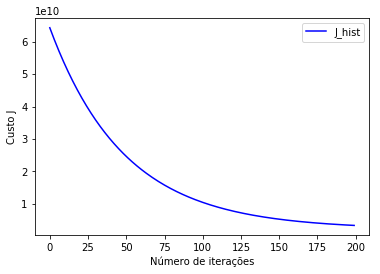

In [26]:
#Testando a função de Gradiente descendente (múltiplas variáveis)
# Verificando comportamento da curva de aprendizado para diferentes valores de alpha
# Atribuindo valores para taxa de aprendizado (alpha)
alpha = 0.01
num_iters = 200

#Inicializa Theta e executa a função Gradiente descendente
theta = np.zeros((3, 1))
theta, J_hist = gdmulti(X, y, theta, alpha, num_iters)

#visualizando comportamento da função de custo
plota(num_iters, J_hist)


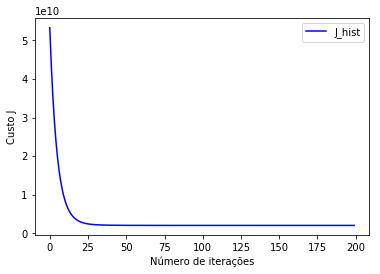

In [27]:
# Atribuindo valor maior para alpha
alpha = 0.1
num_iters = 200

#Inicializa Theta e executa a função Gradiente descendente
theta = np.zeros((3, 1))
theta, J_hist = gdmulti(X, y, theta, alpha, num_iters)

#visualizando comportamento da função de custo
plota(num_iters, J_hist)

Nesse caso, com uma taxa de aprendizado maior, houve uma convergência mais rápida. 

# Regressão logística 

A Regressão logística fornece uma previsão sempre entre 0 e 1. É utilizado para problemas de classificação.
Desta forma, a variável y que queremos prever deve ser discreta. Nesta tarefa, será criado uma classificador
para predizer se um estudante será admitido em uma universidade, com base nos resultados de duas avaliações.


In [28]:
# Importando bibliotecas
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

## Visualização dos dados
Antes de começar a implementar qualquer algoritmo de aprendizado, é adequado
visualizar os dados, quando possível. Nessa parte do trabalho, após
carregar o arquivo com o conjunto de treinamento será produzido um
gráfico com os pontos de dados

In [29]:
arquivo = 'C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T1\\ex2data1.txt'  
dados = pd.read_csv(arquivo, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])  


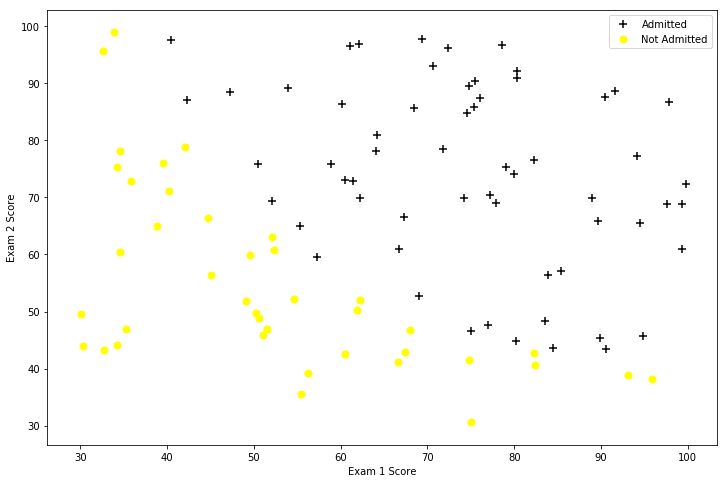

In [30]:
positive = dados[dados['Admitted'].isin([1])]  
negative = dados[dados['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='Black', marker='+', label='Admitted')  
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='Yellow', marker='o', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')  

### Função sigmoide
Como primeiro passo nessa parte, é implementada a função em Python que calcula
o valor da função sigmoide.

In [31]:
%run -i "sigmoide.py"

"""
def sigmoide(z):
    return 1. / (1+np.exp(-z))
"""

'\ndef sigmoide(z):\n    return 1. / (1+np.exp(-z))\n'

Após finalizar sua implementação, se pode verificar sua corretude.
Se chamar sigmoide(0), o valor retornado deve ser 0,5.
Essa função quando chamada com valores muito grandes e positivos (muito grandes negativos) deve retornar um valor muito próximo de 1 (0). 


0.5
0.999876605424
0.000123394575986


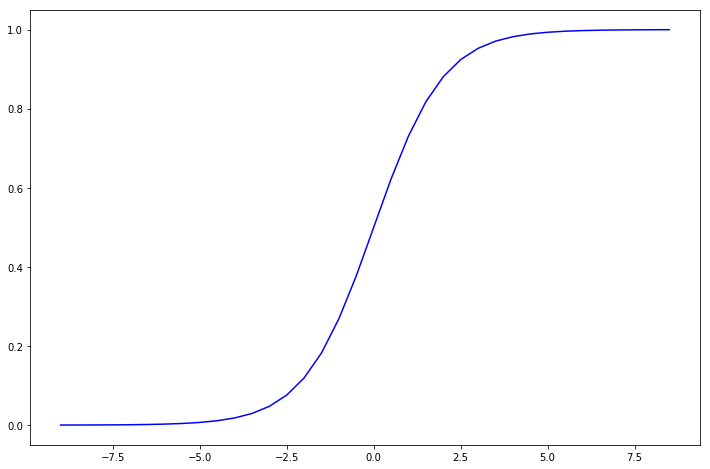

In [32]:
print (sigmoide(0))
print (sigmoide(9))
print (sigmoide(-9))

testesigmoide = np.arange(-9, 9, step=.5)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(testesigmoide, sigmoide(testesigmoide), 'b')  

In [33]:
%run -i "funcaoCustoRegressaoLogistica.py"
"""
def funcaoCustoRegressaoLogistica(theta,X, y,retornagradiente=False):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    a = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    b = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    resultado = np.sum(a - b) / (len(X))
    
    # Se não for solicitado que seja retornado o valor do gradiente
    # com retornagradiente = 1, a função vai retornar somente
    # o valor do custo.
    if retornagradiente==True:
        return resultado, gradiente(theta,X, y)
    else:
        return resultado
"""
def gradiente(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parametros = int(theta.ravel().shape[1])
    grad = np.zeros(parametros)
    erro = sigmoide(X * theta.T) - y #Calcula o erro com a função sigmoide

    for i in range(parametros):
        termo = np.multiply(erro, X[:,i])
        grad[i] = np.sum(termo) / len(X)

    return grad

In [34]:
# Adicionando uma coluna com '1' para facilitar a multiplicação com matrizes
dados.insert(0, 'Ones', 1)

In [35]:
# Definindo X (dados de treinamento) e y (variável alvo)
cols = dados.shape[1]  
X = dados.iloc[:,0:cols-1]  
y = dados.iloc[:,cols-1:cols]

# convertendo para vetores numpy e inicializando theta
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(3)  



Uma vez que implementada essa função, ao realizar uma chamada usando
o valor inicial de θ, se deve confirmar que o valor produzido é aproximadamente
0,693.

In [36]:
custo = funcaoCustoRegressaoLogistica(theta,X,y,True)

print('Valor de função de custo e gradiente: \n', custo)#o gradiente é um vetor com o mesmo número de elementos que θ.


Valor de função de custo e gradiente: 
 (0.69314718055994529, array([ -0.1       , -12.00921659, -11.26284221]))


## Aprendizado dos parâmetros

Para a regressão logística, o objetivo é minimizar J(θ) com relação ao vetor
de parâmetros θ. Sendo assim, nessa parte se deve implementar uma função
em Python para encontrar o vetor θ que minimiza a função de custo, utilizando a
função funcaoCustoRegressaoLogistica implementada previamente.

No Python, se pode usar a API de otimização (optimize) da biblioteca SciPy para aprendizado dos parâmetros das funções para calcular o custo e os gradientes.

In [37]:
import scipy.optimize as opt  
resultado = opt.fmin_tnc(func=funcaoCustoRegressaoLogistica, x0=theta, fprime=gradiente, args=(X, y))  
print("O valor do custo otimizado é: %.4f" %funcaoCustoRegressaoLogistica(resultado[0], X, y) )


O valor do custo otimizado é: 0.2035


In [38]:
theta_min = np.matrix(resultado[0]) 
print ('Theta otimizado: %s' % theta_min)

Theta otimizado: [[-25.1613186    0.20623159   0.20147149]]


## Avaliação do modelo
Após o aprendizado dos parâmetros, se pode usar o modelo correspondente
para predizer se um candidato qualquer será aprovado. Para um candidato
com notas 45 e 85 na primeira e segunda avaliações, respectivamente, se deve
esperar que ele seja aprovado com probabilidade 0,776.

In [45]:
prob = sigmoide(np.array([1, 45, 85]).dot(np.squeeze(np.asarray(theta_min))))
print ("Para estudantes com notas 45 e 85, a admissão é prevista com probabilidade: %.3f" % (prob))

Para estudantes com notas 45 e 85, a admissão é prevista com probabilidade: 0.776


Nessa parte, se deve implementar uma função denominada predizer. Essa função
deve produzir os valores 0 ou 1, dados um exemplo do conjunto de treinamento
o vetor de parâmetros θ. Se usa essa função para produzir a porcentagem de
acertos do classificador sobre o conjunto de treinamento.

In [48]:
def predizer(theta, X):  
    probabilidade = sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probabilidade]

predicao = predizer(theta_min, X)  
correta = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predicao, y)]  
precisao = (sum(map(int, correta)) % len(correta))  # Cálculo da precisao de acordo com a fórmula
print ('Porcentagem de acertos do classificador sobre o conjunto de treinamento = %.2f %%' % (precisao))

Porcentagem de acertos do classificador sobre o conjunto de treinamento = 89.00 %
